In [1]:
%matplotlib inline
#!/usr/bin/python
#from __future__ import unicode_literals

In [2]:

import numpy as np
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
from copy import deepcopy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from pyjarowinkler import distance
from gensim.summarization import bm25
import nltk
import numpy as np
import random
import pickle
import scipy
import sklearn
import tqdm
import seaborn as sns

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)


In [3]:
from my_utils import Attention,plot_learning_curve,plot_model,plot_model_graph,zipf

Using TensorFlow backend.


In [4]:
from __future__ import unicode_literals
import xml.etree.ElementTree as ET
import copy
from pprint import pprint
import numpy as np
import pandas as pd
import numpy as np
import re

import networkx as nx
import matplotlib.pyplot as plt
from wxconv import WXC

import sys

In [5]:
import os
import re
import sys
import numpy as np
import pandas as pd
import sklearn
from collections import Counter
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score
import gensim
from gensim.models import KeyedVectors
import nltk
from nltk.corpus import stopwords
stopword = stopwords.words('english')
import tensorflow as tf
import keras
from keras.models import Model,Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation,Bidirectional
from keras.optimizers import Adam,RMSprop
from keras import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Input,Concatenate,Conv2D,Conv1D,MaxPooling1D
from keras.layers import AlphaDropout,Reshape,Dropout,LSTM,Bidirectional,Lambda,CuDNNLSTM
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from keras.utils import to_categorical

In [6]:
train=open("TREC.train",encoding= "ISO-8859-1").readlines()
trainlabels=[re.split(r":\S+",i)[0] for i in train]
train=[re.split(r":\S+",i)[1].strip() for i in train]

test=open("TREC.test",encoding= "ISO-8859-1").readlines()
testlabels=[re.split(r":\S+",i)[0] for i in test]
test=[re.split(r":\S+",i)[1].strip() for i in test]

labeltoind={}
for i,j in enumerate(list(set(trainlabels))):
    labeltoind[j]=i
trainlabels=[labeltoind[j] for j in trainlabels]
testlabels=[labeltoind[j] for j in testlabels]



In [7]:
PATH="/media/anvesh/Garden of EDEN/Academics/embedding_models/eng/"


from gensim.models import KeyedVectors
embedding_model=KeyedVectors.load_word2vec_format(PATH + "wiki-news-300d-1M.vec")
embeddings_index=embedding_model

In [8]:
maxlen = 20
maxwords = 30000
embed_dim = 300

tok = Tokenizer(num_words=maxwords)
tok.fit_on_texts(train)
word_index = tok.word_index

embedding_matrix = np.zeros((len(word_index) + 1, embed_dim))
for word, i in word_index.items():
    if word in embeddings_index:
        embedding_vector = embeddings_index[word]
    embedding_matrix[i] = embedding_vector


In [9]:
print(len(word_index))

8461


In [10]:
train_seq = tok.texts_to_sequences(train)
trainind = pad_sequences(train_seq,maxlen=maxlen)

test_seq = tok.texts_to_sequences(test)
testind = pad_sequences(test_seq,maxlen=maxlen)

In [11]:
train_to_categorical=to_categorical(trainlabels)
test_to_categorical=to_categorical(testlabels)

In [12]:
#from my_utils import *

In [17]:
c=test_to_categorical.shape[1]
I=Input(shape=(maxlen,))
si=Embedding(len(word_index)+1,embed_dim,weights=[embedding_matrix],trainable=False)(I)
lo=Bidirectional(LSTM(30,return_sequences=True))(si)
ao=Attention(maxlen,name="AttentionLayer")(lo)
do=Dense(100,activation="relu")(ao)
o=Dense(c,activation="softmax")(do)
model=Model(inputs=I,outputs=o)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 20)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 20, 300)           2538600   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 20, 60)            79440     
_________________________________________________________________
AttentionLayer (Attention)   (None, 60)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 100)               6100      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 606       
Total params: 2,624,826
Trainable params: 86,226
Non-trainable params: 2,538,600
_____________________________________________________________

In [18]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
modelcheckpoint = ModelCheckpoint('temp.h5' ,monitor='val_loss', verbose=0, save_best_only=True,mode='min',save_weights_only=True)
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10)
history=model.fit(trainind,train_to_categorical,batch_size=30,validation_split=0.2,callbacks=[modelcheckpoint,earlystop],epochs=20)

Train on 4361 samples, validate on 1091 samples
Epoch 1/20
4361/4361 [==============================] - 8s 2ms/step - loss: 1.3832 - acc: 0.4547 - val_loss: 0.9689 - val_acc: 0.6260
Epoch 2/20
4361/4361 [==============================] - 4s 1ms/step - loss: 0.7435 - acc: 0.7471 - val_loss: 0.6213 - val_acc: 0.7764
Epoch 3/20
4361/4361 [==============================] - 4s 1ms/step - loss: 0.5272 - acc: 0.8168 - val_loss: 0.5396 - val_acc: 0.8075
Epoch 4/20
4361/4361 [==============================] - 6s 1ms/step - loss: 0.4345 - acc: 0.8461 - val_loss: 0.4820 - val_acc: 0.8378
Epoch 5/20
4361/4361 [==============================] - 7s 2ms/step - loss: 0.3552 - acc: 0.8810 - val_loss: 0.4856 - val_acc: 0.8295
Epoch 6/20
4361/4361 [==============================] - 6s 1ms/step - loss: 0.2922 - acc: 0.9051 - val_loss: 0.5102 - val_acc: 0.8304
Epoch 7/20
4361/4361 [==============================] - 6s 1ms/step - loss: 0.2515 - acc: 0.9094 - val_loss: 0.4862 - val_acc: 0.8414
Epoch 8/20
436

500/500 [==============================] - 1s 1ms/step
[0.5109215567111969, 0.8779999995231629]
Overfiting after 3 epochs.


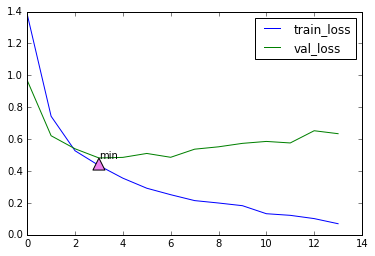

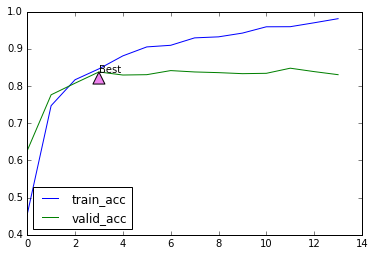

In [19]:
print(model.evaluate(testind,test_to_categorical))
plot_learning_curve(history)

In [45]:
sent=train[100]

def displayatten(sent,mode=model,I=I,lo=lo,ao=ao,tok=tok,plot_sanity=False,plot_attention=True,annotate=True):
    """
    provide sent: sentence
    i : Input tensor (seq)
    lo : lstm layer output tensor
    ao : attention layer output tensor
    tok : Tokenizer(num_words=maxwords)
    model : Complete Model, make sure Attention layer has name 'AttentionLayer' 
    Returns words of sentence in order of Importance, highest to lowest
    """
    seq=tok.texts_to_sequences([sent])
    pseq=pad_sequences(seq,maxlen)
    tempmodel=Model(inputs=I,outputs=[lo,ao])
    attenweights=mode.get_layer('AttentionLayer').get_weights()
    w=attenweights[0]
    b=attenweights[1]
    lout,aout=tempmodel.predict([pseq])
    temp=np.tanh((lout @ w) + b)
    alphas=softmax(temp.T).T
    plt.figure(figsize=(len(sent)/2,1))
    if plot_sanity==True:
        wsum=np.average(lout.reshape(lout.shape[1:]),weights=alphas.reshape(alphas.shape[1:]),axis=0)
        print("Sanity check")
        plt.plot(aout[0])
        plt.plot(wsum)
        plt.show()
    l=len(sent.split())
    a=alphas.reshape(alphas.shape[1])[-l:]
    s=np.array(sent.split())
    if annotate==False:
        sns.heatmap(alphas)
        plt.show()       
    elif plot_attention==True:
        sns.heatmap(a.reshape(1,a.shape[0]),annot=s.reshape(1,s.shape[0]),fmt="",annot_kws={"size": 20})
        plt.show()
    print(np.argmax(model.predict([pseq])))
    return [x for _,x in sorted(zip(a,s),reverse=True)]

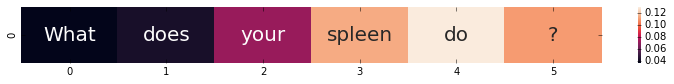

2


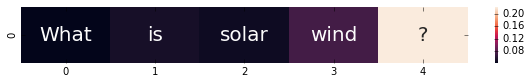

2


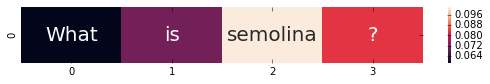

2


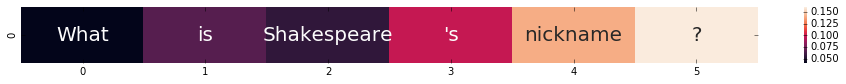

3


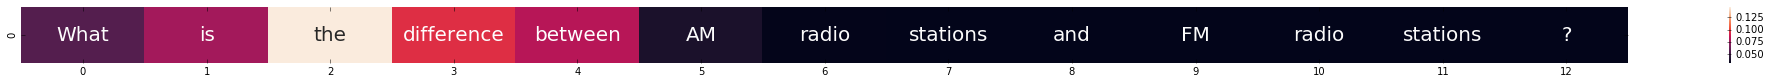

2


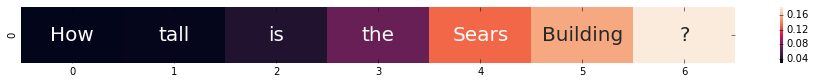

1


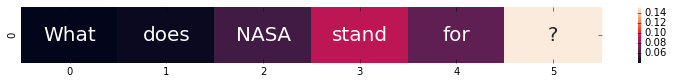

5


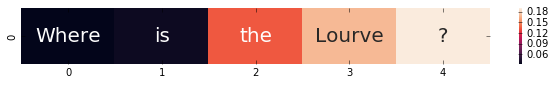

4


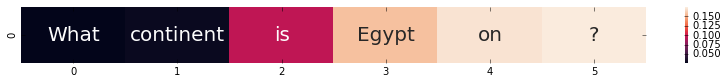

4


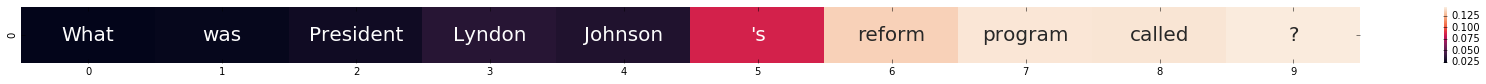

3


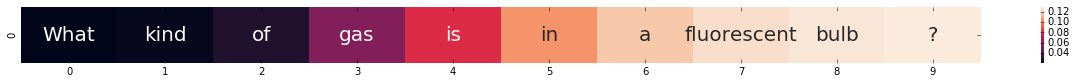

0


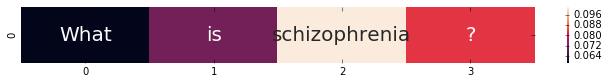

2


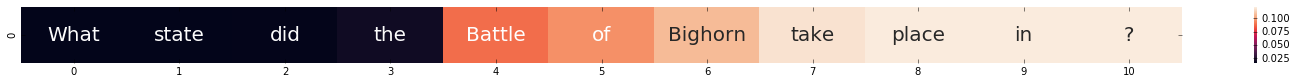

4


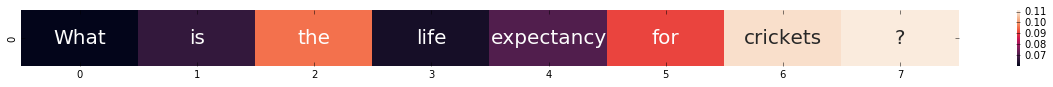

1


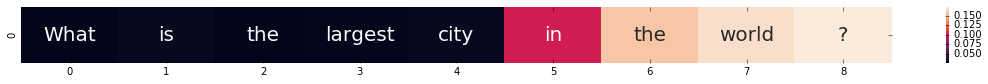

4


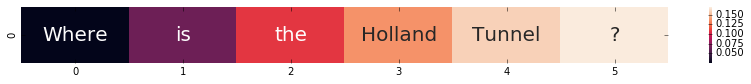

4


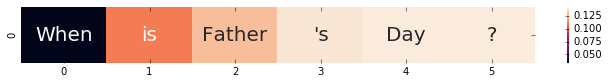

1


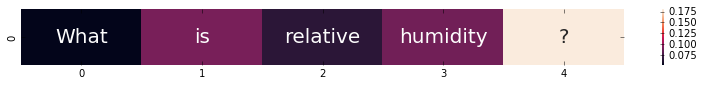

2


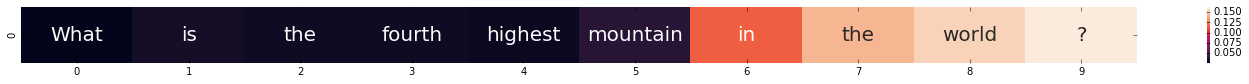

4


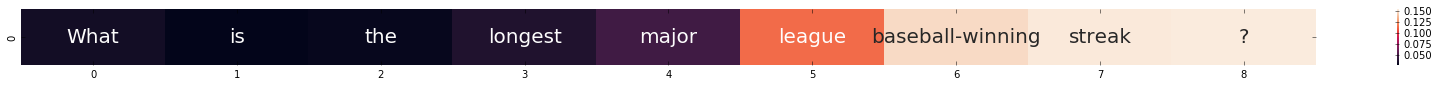

3


In [48]:
for i in random.sample(test,20):
    displayatten(i)

In [24]:
labeltoind

{'ABBR': 5, 'DESC': 2, 'ENTY': 0, 'HUM': 3, 'LOC': 4, 'NUM': 1}

In [ ]:
displayatten( 'What is i ?',mode=model1)

In [101]:
labeltoind

{'ABBR': 5, 'DESC': 4, 'ENTY': 0, 'HUM': 1, 'LOC': 2, 'NUM': 3}

500/500 [==============================] - 0s 825us/step
[0.7109441890716552, 0.8719999990463256]
Overfiting after 19 epochs.


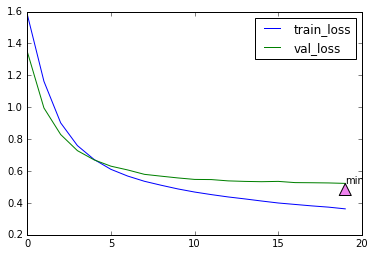

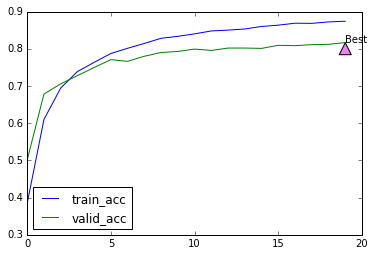

In [93]:
print(model.evaluate(testind,test_to_categorical))
plot_learning_curve(history)

In [104]:
test

['How far is it from Denver to Aspen ?',
 'What county is Modesto , California in ?',
 'Who was Galileo ?',
 'What is an atom ?',
 'When did Hawaii become a state ?',
 'How tall is the Sears Building ?',
 'George Bush purchased a small interest in which baseball team ?',
 "What is Australia 's national flower ?",
 'Why does the moon turn orange ?',
 'What is autism ?',
 'What city had a world fair in 1900 ?',
 "What person 's head is on a dime ?",
 'What is the average weight of a Yellow Labrador ?',
 'Who was the first man to fly across the Pacific Ocean ?',
 'When did Idaho become a state ?',
 'What is the life expectancy for crickets ?',
 'What metal has the highest melting point ?',
 'Who developed the vaccination against polio ?',
 'What is epilepsy ?',
 'What year did the Titanic sink ?',
 'Who was the first American to walk in space ?',
 'What is a biosphere ?',
 'What river in the US is known as the Big Muddy ?',
 'What is bipolar disorder ?',
 'What is cholesterol ?',
 'Who de

In [15]:


class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= tf.cast(mask, K.floatx())
        a /= tf.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim
